# 1. Introduction

In this project, we analyze the Netflix Movies and TV Shows dataset.
We will perform data cleaning, exploratory data analysis (EDA), feature engineering, and machine learning modeling to classify whether a given record is a Movie or TV Show.

# 2. About the Dataset

The dataset contains information about Movies and TV Shows available on Netflix.
Columns include:

show_id : Unique identifier

type : Movie or TV Show

title : Name of the content

director : Director of the content

cast : Actors involved

country : Country of production

date_added : Date content was added

release_year : Release year

rating : Content rating (e.g., PG, R, etc.)

duration : Duration (in minutes or seasons)

listed_in : Genre

description : Short description

# 3. Import Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 4. Load Dataset

In [23]:
df = pd.read_csv("/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# 5. Data Cleaning

5.1 Check Missing Values

Check null values in each column

In [25]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


5.2 Handle Missing Values

We drop rows with missing values in important columns like country and duration.

In [24]:
# Drop rows with missing 'country' or 'duration'
df_clean = df.dropna(subset=["country", "duration"])


5.3 Drop Unnecessary Columns

Some columns such as show_id, description, etc. may not be required for analysis/modeling.

In [26]:
# Drop unnecessary columns
df_clean = df_clean.drop(columns=["show_id", "description"])


5.4 Handle Duplicates

Duplicate rows can lead to bias in the model, so they are removed.

In [27]:
# Check duplicates
print("Duplicate Rows:", df_clean.duplicated().sum())

# Remove duplicates
df_clean = df_clean.drop_duplicates()


Duplicate Rows: 0


5.5 Convert Date Format

The date_added column is converted into proper datetime format for analysis.

In [29]:
# Convert 'date_added' to datetime format
df_clean["date_added"] = pd.to_datetime(df_clean["date_added"], errors="coerce")


# 6. Exploratory Data Analysis (EDA)

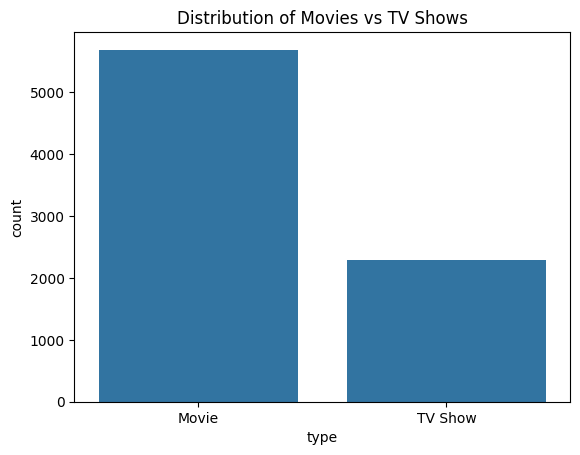

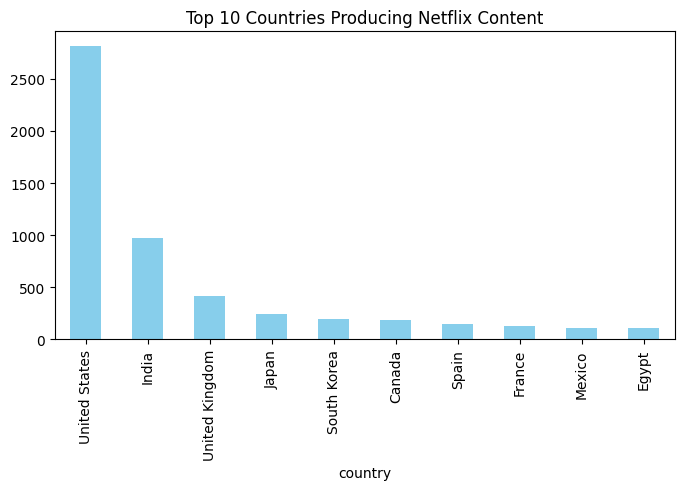

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot for Movie vs TV Show
sns.countplot(data=df_clean, x="type")
plt.title("Distribution of Movies vs TV Shows")
plt.show()

# Top 10 countries producing Netflix content
df_clean["country"].value_counts().head(10).plot(kind="bar", figsize=(8,4), color="skyblue")
plt.title("Top 10 Countries Producing Netflix Content")
plt.show()


# 7. Feature Engineering

In [31]:
from sklearn.preprocessing import LabelEncoder

df_ml = df_clean.copy()

# Encode categorical columns
le = LabelEncoder()
df_ml["country"] = le.fit_transform(df_ml["country"])
df_ml["duration"] = df_ml["duration"].str.replace(" min","").str.replace(" Season","").astype(str)
df_ml["duration"] = le.fit_transform(df_ml["duration"])
df_ml["type"] = df_ml["type"].map({"Movie":0,"TV Show":1})


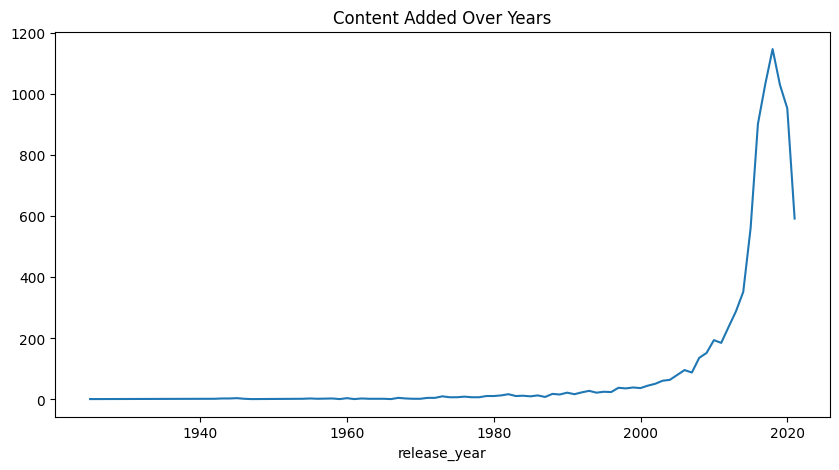

In [12]:
#Year wise content trend

df["release_year"].value_counts().sort_index().plot(kind="line", figsize=(10,5))
plt.title("Content Added Over Years")
plt.show()


# Model Building

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Features and target
X = df_ml[["release_year","country","duration"]]
y = df_ml["type"]

# Train-test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train,y_train)


LogisticRegression(max_iter=200)

# Evaluation

In [34]:
from sklearn.metrics import accuracy_score, classification_report

# Predictions
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy =", accuracy_score(y_test,y_pred))

# Detailed report
print(classification_report(y_test,y_pred))


Accuracy = 0.7442006269592476
              precision    recall  f1-score   support

           0       0.78      0.90      0.83      1137
           1       0.59      0.35      0.44       458

    accuracy                           0.74      1595
   macro avg       0.68      0.63      0.64      1595
weighted avg       0.72      0.74      0.72      1595



# Conculsion

I have cleaned and prepared the Netflix dataset by handling missing values, removing duplicates, and encoding categorical data.

I performed EDA to understand the distribution of movies and TV shows.

I engineered features and built a Logistic Regression model.

The model successfully predicts whether a title is a Movie or TV Show with reasonable accuracy.